# Time series analysis using PJMs Energy Consumption for USA


## Questions which will guide our investigation:
    
###  1. Is there an hourly, daily or monthly pattern in energy concumption?
###   2. What is the trend in the energy consumption between 2002 and 2018?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import pymannkendall as mk

In [2]:
# Import the data
df = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\Energy\PJM\PJME_hourly.csv')
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


# Data Cleaning

In [3]:
#Rename columns to simpler names
col_names = ['datetime', 'power']
df.columns = col_names
df

,datetime,power
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [4]:
# Check for missing data in each column
for col in df.columns:
    missing =  np.sum(df[col].isnull())
    print(col, missing)

datetime 0
power 0


In [5]:
# Check data types
df.dtypes

datetime     object
power       float64
dtype: object

In [6]:
# Change 'datetime' column to data type datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime    datetime64[ns]
power              float64
dtype: object

In [7]:
# Set datetime as index column
df = df.set_index('datetime')
df

,power
datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


# Hourly, Daily, and Monthly Investigation

In [8]:
# Create columns for hourly, daily, monthly and yearly groupings
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month
df['year'] = df.index.year
df

,power,hour,day_of_week,month,year
datetime,,,,,
2002-12-31 01:00:00,26498.0,1,Tuesday,12,2002
2002-12-31 02:00:00,25147.0,2,Tuesday,12,2002
2002-12-31 03:00:00,24574.0,3,Tuesday,12,2002
2002-12-31 04:00:00,24393.0,4,Tuesday,12,2002
2002-12-31 05:00:00,24860.0,5,Tuesday,12,2002
...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,Monday,1,2018
2018-01-01 21:00:00,43751.0,21,Monday,1,2018
2018-01-01 22:00:00,42402.0,22,Monday,1,2018


In [9]:
# Create the groups/aggregates
hourly = df.groupby(['hour']).mean().round(1)
df_hourly = hourly.drop(columns=['year', 'month'])
df_hourly = df_hourly.reset_index()
df_hourly

,hour,power
0,0,29523.6
1,1,27535.6
2,2,26344.1
3,3,25679.1
4,4,25414.9
5,5,25749.4
6,6,27162.9
7,7,29611.0
8,8,31490.8
9,9,32628.9


In [10]:
# Create daily grouping
daily = df.groupby(['day_of_week']).mean().round(1)
df_daily = daily.drop(['year', 'hour', 'month'], axis=1)
df_daily = df_daily.reset_index()
df_daily

,day_of_week,power
0,Friday,32688.1
1,Monday,32672.0
2,Saturday,30162.9
3,Sunday,29411.9
4,Thursday,33085.9
5,Tuesday,33272.3
6,Wednesday,33261.5


In [13]:
# Create monthly grouping
monthly = df.groupby(['month']).mean().round(1)
df_monthly = monthly.drop(['year', 'hour'], axis=1)
df_monthly = df_monthly.reset_index()

#Create new column with month names
df_monthly['month_name'] = df_monthly['month'].apply(lambda x: calendar.month_abbr[x])
df_monthly

,month,power,month_name
0,1,34343.2,Jan
1,2,33435.0,Feb
2,3,30514.9,Mar
3,4,27863.3,Apr
4,5,28695.4,May
5,6,33811.8,Jun
6,7,37882.0,Jul
7,8,36596.0,Aug
8,9,31484.1,Sep
9,10,28119.2,Oct


In [14]:
# Create yearly averages
yearly = df.groupby('year').mean().round(1)
df_yearly = yearly.drop(['hour', 'month'], axis=1)
df_yearly = df_yearly.reset_index()
df_yearly['year'] = pd.to_datetime(df_yearly['year'], format='%Y')
df_yearly

,year,power
0,2002-01-01,31565.6
1,2003-01-01,31698.8
2,2004-01-01,32270.4
3,2005-01-01,33310.5
4,2006-01-01,32409.3
5,2007-01-01,33613.5
6,2008-01-01,32929.6
7,2009-01-01,31851.5
8,2010-01-01,33101.2
9,2011-01-01,32368.3


In [15]:
#Create date only column
df['day'] = df.index.date
df_t = df.reset_index()
df_date = df_t.drop(['datetime', 'hour', 'day_of_week', 'month', 'year'], axis=1)
df_date

,power,day
0,26498.0,2002-12-31
1,25147.0,2002-12-31
2,24574.0,2002-12-31
3,24393.0,2002-12-31
4,24860.0,2002-12-31
...,...,...
145361,44284.0,2018-01-01
145362,43751.0,2018-01-01
145363,42402.0,2018-01-01
145364,40164.0,2018-01-01


Text(0.5, 1.0, 'Hourly Consumption')

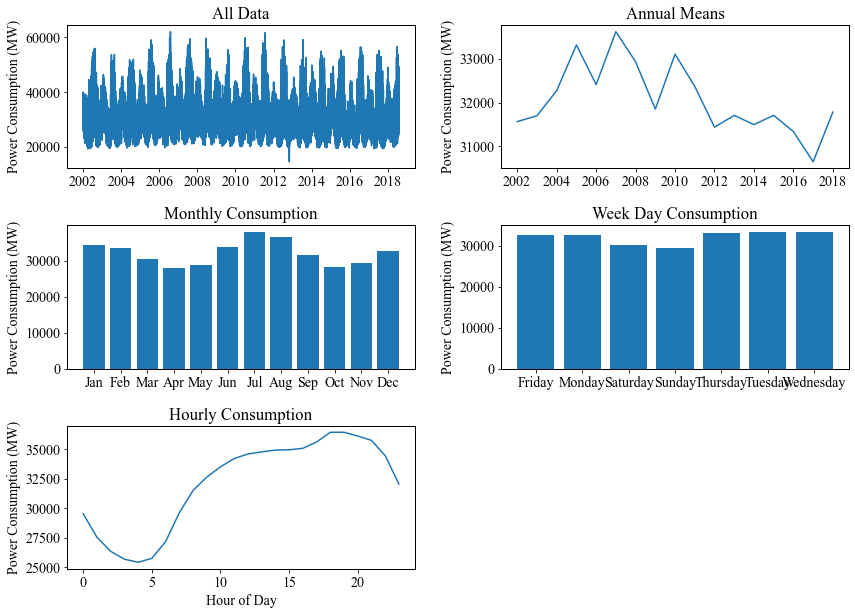

In [16]:
# Make the Plots
fig = plt.subplots(figsize=(14,10))
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1
plt.gcf().subplots_adjust(hspace=0.4, wspace=0.25)

ax1 = plt.subplot(3,2,1)
plt.plot('day', 'power', data=df_date)
plt.ylabel('Power Consumption (MW)')
plt.title('All Data')

ax2 = plt.subplot(3,2,2)
plt.plot('year', 'power', data=df_yearly)
plt.ylabel('Power Consumption (MW)')
plt.title('Annual Means')

ax3 = plt.subplot(3,2,3)
plt.bar('month_name', 'power', data=df_monthly)
plt.ylabel('Power Consumption (MW)')
plt.title('Monthly Consumption')

ax4 = plt.subplot(3,2,4)
plt.bar('day_of_week', 'power', data=df_daily)
plt.ylabel('Power Consumption (MW)')
plt.title('Week Day Consumption')

ax5 = plt.subplot(3,2,5)
plt.plot('hour', 'power', data=df_hourly)
plt.ylabel('Power Consumption (MW)')
plt.xlabel('Hour of Day')
plt.title('Hourly Consumption')

In [21]:
# Investigate Power Decrease after 2012
# Direct calculations have been made because the data points are few

df_yearly
Avg_before_2012 = (31565.6 + 31698.8 + 32270.4 + 33310.5 + 32409.3 + 33613.5 + 32929.6 + 31851.5 + 33101.2 + 32368.3)/10
Avg_before_2012 = round(Avg_before_2012)

Avg_starting_2012_to_2018 = (31440.1 + 31706.5 + 31496.4 + 31709.4 + 31337.8 + 30650.9 + 31782.6)/7
Avg_starting_2012_to_2018 = round(Avg_starting_2012_to_2018)

# Percentage change
percentage_decrease = ((Avg_before_2012 - Avg_starting_2012_to_2018)/Avg_before_2012)*100
percentage_decrease = round(percentage_decrease)
print('Percentage Decrease is', percentage_decrease,'%')

Percentage Decrease is 3 %


# Timeseries Decomposition

In [22]:
# Create data with monthly frequency. I want to do a trend analysis using monthly data since daily data is too noisy
df_tms_m = df.reset_index()
df_tms_m = df_tms_m.drop(['datetime', 'hour', 'day_of_week', 'month', 'year'], axis=1)
df_tms_m = df_tms_m.groupby(pd.PeriodIndex(df['day'], freq='M'))['power'].mean().round(1).reset_index()
df_tms_m

,day,power
0,2002-01,31075.4
1,2002-02,30239.2
2,2002-03,28875.3
3,2002-04,28534.7
4,2002-05,28073.7
...,...,...
195,2018-04,27353.3
196,2018-05,28600.0
197,2018-06,32014.5
198,2018-07,36696.7


In [23]:
# Set day column to be the index
df_tms_m = df_tms_m.set_index('day')
df_tms_m

,power
day,
2002-01,31075.4
2002-02,30239.2
2002-03,28875.3
2002-04,28534.7
2002-05,28073.7
...,...
2018-04,27353.3
2018-05,28600.0
2018-06,32014.5


In [24]:
#Change index to timestamp
df_tms_m.index = df_tms_m.index.to_timestamp()
df_tms_m

,power
day,
2002-01-01,31075.4
2002-02-01,30239.2
2002-03-01,28875.3
2002-04-01,28534.7
2002-05-01,28073.7
...,...
2018-04-01,27353.3
2018-05-01,28600.0
2018-06-01,32014.5


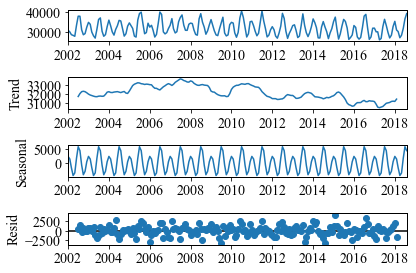

In [25]:
# Now perform decomposition using seasonal decompose method
decompose_result_monthly = seasonal_decompose(df_tms_m, model='additive', period=12)
decompose_result_monthly.plot()
plt.show()

In [26]:
# Save trend data and apply a Mann-Kendall statistical test to it
trend_data_sd = decompose_result_monthly.trend
trend_data_sd = trend_data_sd.reset_index()
trend_data_sd 
#For this method, the first 5 and last 5 rows will be empty

,day,trend
0,2002-01-01,NaN
1,2002-02-01,NaN
2,2002-03-01,NaN
3,2002-04-01,NaN
4,2002-05-01,NaN
...,...,...
195,2018-04-01,NaN
196,2018-05-01,NaN
197,2018-06-01,NaN
198,2018-07-01,NaN


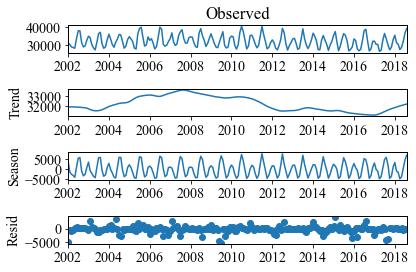

In [27]:
# Now perform decomposition using the STL method
decompose_result_monthly_stl = STL(df_tms_m, robust=True, period=12).fit()
decompose_result_monthly_stl.plot()
plt.show()

In [28]:
# Save trend data and apply a Mann-Kendall statistical test to it
trend_data_stl = decompose_result_monthly_stl.trend
trend_data_stl = trend_data_stl.reset_index()
trend_data_stl

,day,trend
0,2002-01-01,31943.244675
1,2002-02-01,31949.688207
2,2002-03-01,31952.162650
3,2002-04-01,31950.503476
4,2002-05-01,31945.030531
...,...,...
195,2018-04-01,32039.300535
196,2018-05-01,32088.149704
197,2018-06-01,32134.912355
198,2018-07-01,32179.454267


# Trend Analysis using Mann-Kendall Test

In [29]:
mk.original_test(trend_data_sd['trend'])

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-8.883270000448153, Tau=-0.4359995448856525, s=-7664.0, var_s=744135.3333333334, slope=-8.874964256535932, intercept=32936.76519352533)

In [30]:
mk.original_test(trend_data_stl['trend'])

Mann_Kendall_Test(trend='decreasing', h=True, p=5.329070518200751e-15, z=-7.81668882790357, Tau=-0.37175879396984923, s=-7398.0, var_s=895500.0, slope=-6.93159659255241, intercept=32657.736142099573)

# Results

### 1. The energy consumption decreased by 3% after the year 2012
### 2. Energy consumption was highest during July and August
### 3. Energy consumption was lowest during the weekend. It was below 30,000 MW
### 4. Energy consumption was lowest between 2 am to 6 am and it was highest between 5 pm to 10 pm
### 5. Overall, there was a signficant decrease in energy consumption from 2002 to 2018.